In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e8/sample_submission.csv
/kaggle/input/playground-series-s3e8/train.csv
/kaggle/input/playground-series-s3e8/test.csv
/kaggle/input/gemstone-price-prediction/cubic_zirconia.csv
/kaggle/input/gemstone-price-prediction/Data Dictionary.xlsx


# If you like --> Upvote

# Information about Variables

* Carat -> Carat weight of the cubic zirconia.

* Cut   ->  Describe the cut quality of the cubic zirconia. Quality is increasing order Fair,Good,Very Good,Premium,Ideal.

* Color ->  Colour of the cubic zirconia.With D being the best and J the worst.

* Clarity ->  cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst,
FL= flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

* Depth ->  The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.

* Table ->  The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

* Price ->  the Price of the cubic zirconia.

* X -> Length of the cubic zirconia in mm.

* Y ->  Width of the cubic zirconia in mm.

* Z ->  Height of the cubic zirconia in mm.

# 1. Importing packages

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder ,LabelEncoder ,OrdinalEncoder
from scipy import stats
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import mutual_info_regression

# 2. Read data

In [3]:
train = pd.read_csv('/kaggle/input/playground-series-s3e8/train.csv')
test_  = pd.read_csv('/kaggle/input/playground-series-s3e8/test.csv')
actual  = pd.read_csv('/kaggle/input/gemstone-price-prediction/cubic_zirconia.csv')

In [4]:
train = train.drop('id' ,axis =1)
actual = actual.dropna(axis = 0)
actual = actual.drop('Unnamed: 0' ,axis = 1)

# 3. Concating data sets

In [5]:
og = pd.concat([train ,actual])
print(og.shape)

(219843, 10)


In [6]:
og.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


# 4. EDA

## 4.1. Summary of Data

In [7]:
og.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219843 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    219843 non-null  float64
 1   cut      219843 non-null  object 
 2   color    219843 non-null  object 
 3   clarity  219843 non-null  object 
 4   depth    219843 non-null  float64
 5   table    219843 non-null  float64
 6   x        219843 non-null  float64
 7   y        219843 non-null  float64
 8   z        219843 non-null  float64
 9   price    219843 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 18.4+ MB


## 4.2. Descriptive Statistics

In [8]:
og.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,219843.0,0.791561,0.464452,0.2,0.40,0.70,1.03,4.50
depth,219843.0,61.811561,1.126671,50.8,61.20,61.90,62.40,73.60
table,219843.0,57.254960,1.960128,49.0,56.00,57.00,58.00,79.00
x,219843.0,5.716968,1.111606,0.0,4.70,5.70,6.52,10.23
y,219843.0,5.721633,1.110180,0.0,4.71,5.72,6.51,58.90
z,219843.0,3.534532,0.690173,0.0,2.90,3.53,4.03,31.30
price,219843.0,3965.429379,4032.923613,326.0,949.00,2398.00,5405.00,18818.00


## 4.3.  Correlation

### 4.3.1. Correlation matirx - For Numerical 



<AxesSubplot:>

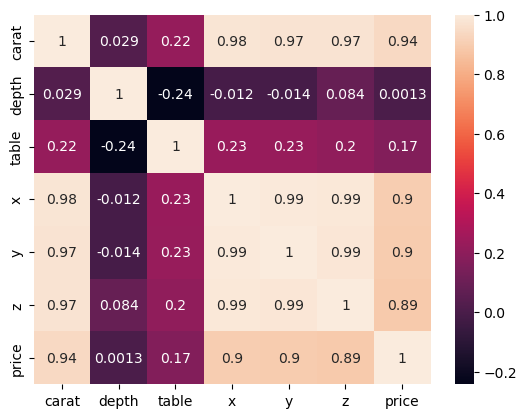

In [9]:
# If both the input and output variables are numeric, you can use either the Pearson or Spearman correlation matrix
# 1 . pearson's correlation matrix
numeric = og[['carat' , 'depth' ,'table' ,'x' ,'y' ,'z' , 'price']] # this are the all numeric columns
sns.heatmap(numeric.corr() ,annot = True)

<AxesSubplot:>

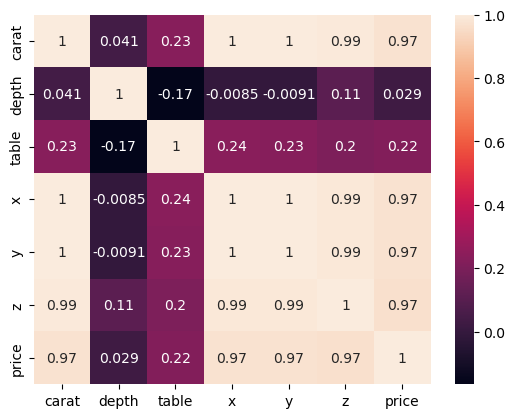

In [10]:
# 2. Spearman's 
sns.heatmap(numeric.corr("spearman") ,annot = True)

### 4.3.2. Correlation matirx - For Categorical

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


<AxesSubplot:>

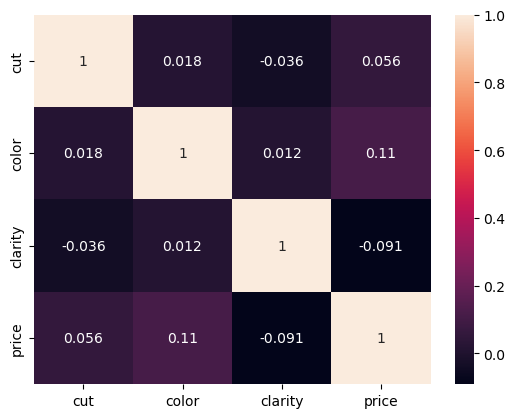

In [11]:
# If  input variables categorical and output variables are numeric, you can use Kendall's , ANNOVA
# 1. kendal's 
cate = og[['cut' ,'color' ,'clarity']]

encoder = LabelEncoder()

encoded = cate.apply(encoder.fit_transform)
encoded['price'] = train['price']

sns.heatmap(encoded.corr("kendall") ,annot = True)

In [12]:
# 2 ANNOVA test


## 4.4.  plots

### 4.4.1.  Plots for numeric columns

In [13]:
numeric.head()

,carat,depth,table,x,y,z,price
0,1.52,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,61.6,56.0,4.38,4.41,2.71,666
4,1.70,62.6,59.0,7.65,7.61,4.77,14453


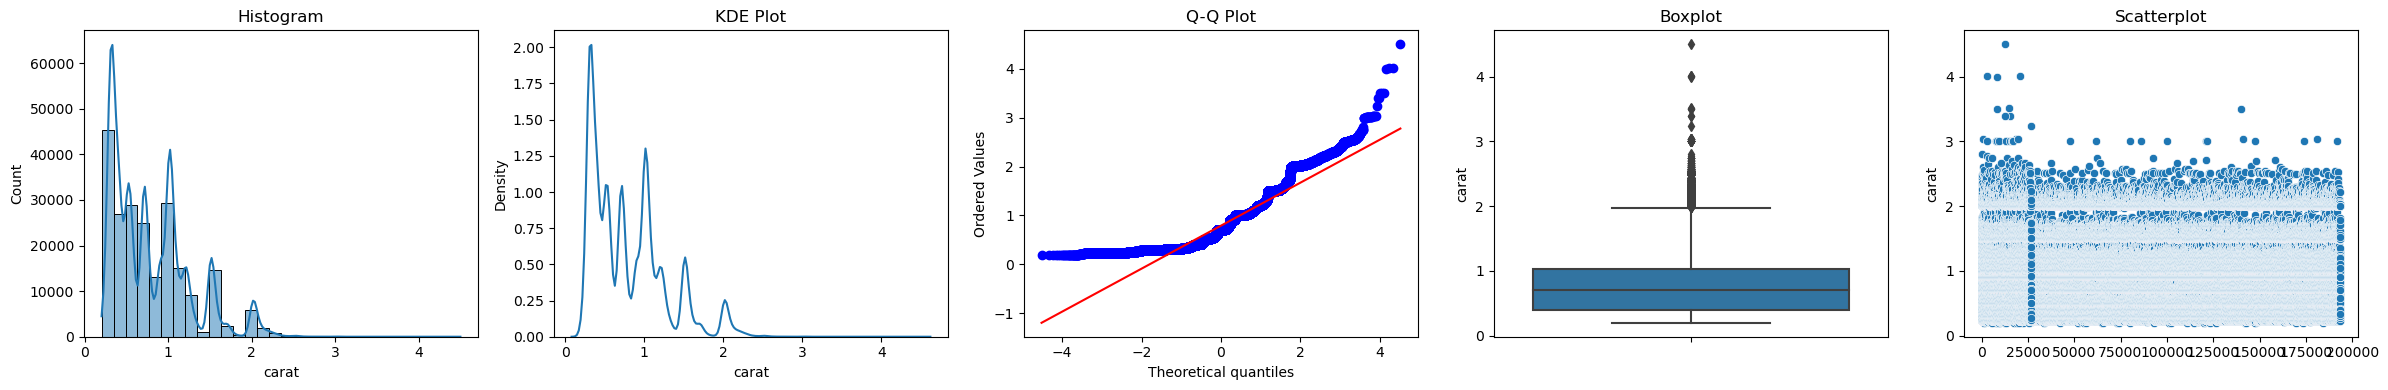

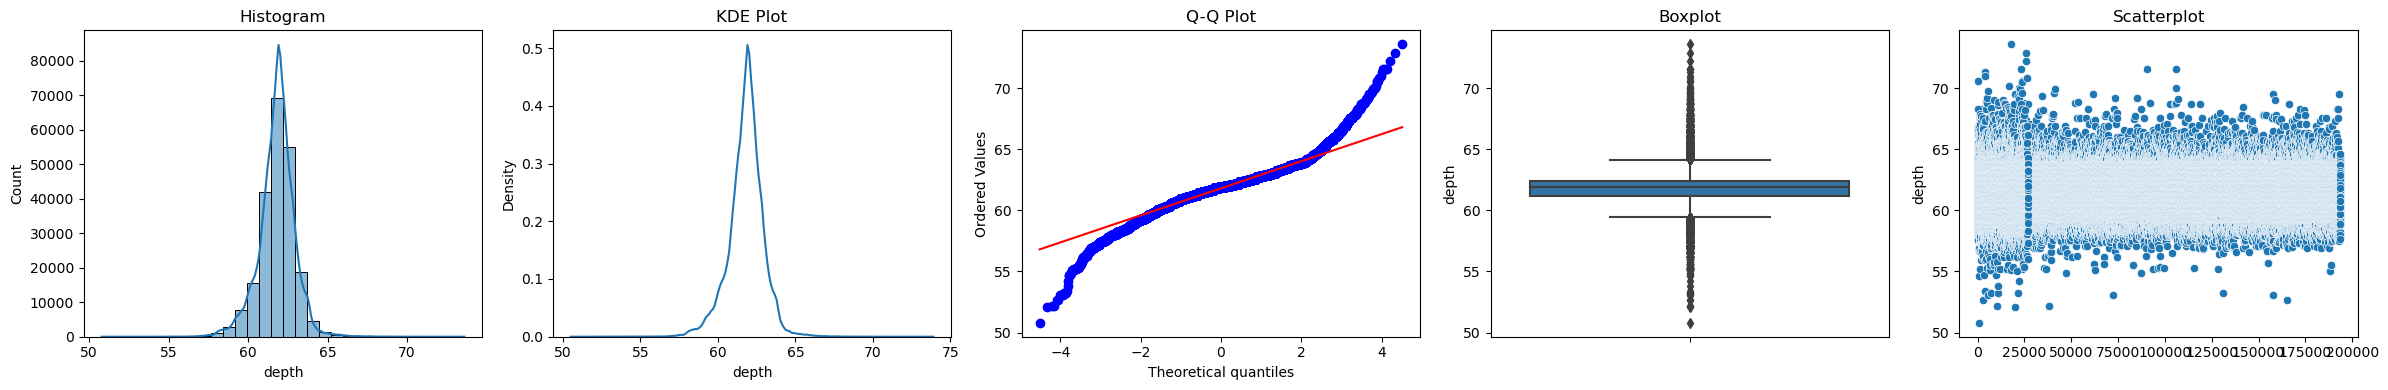

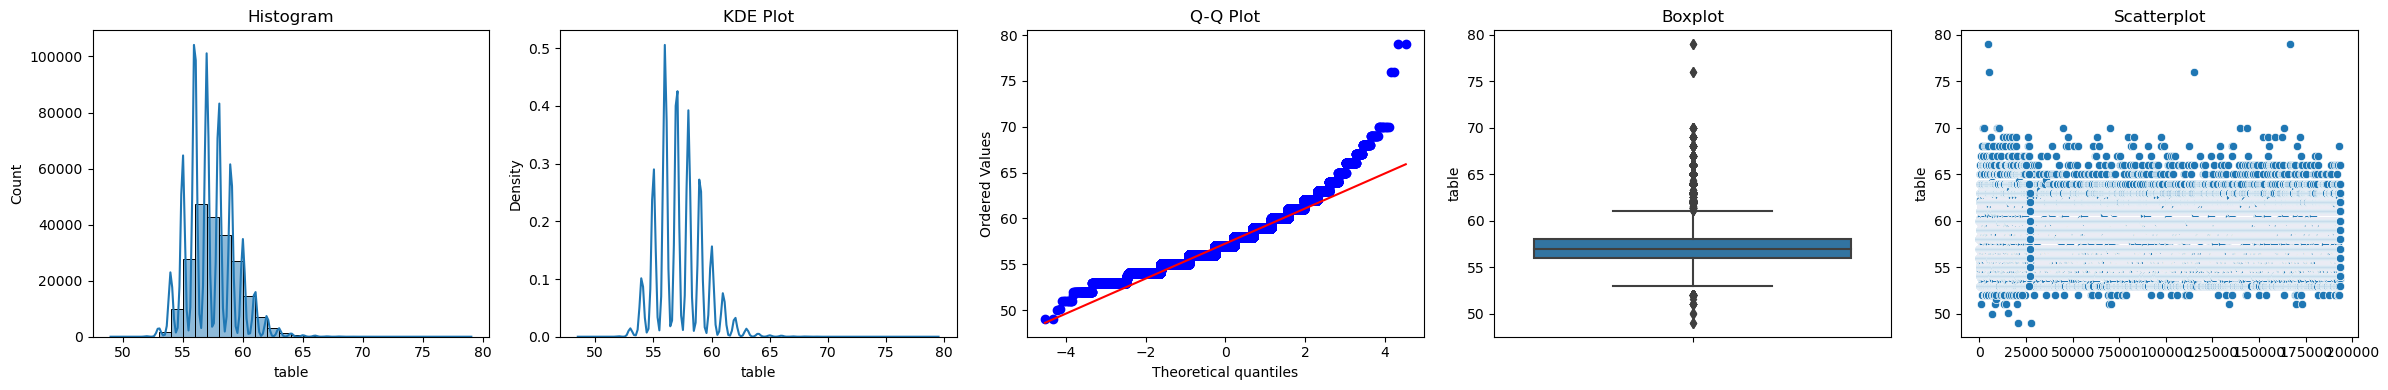

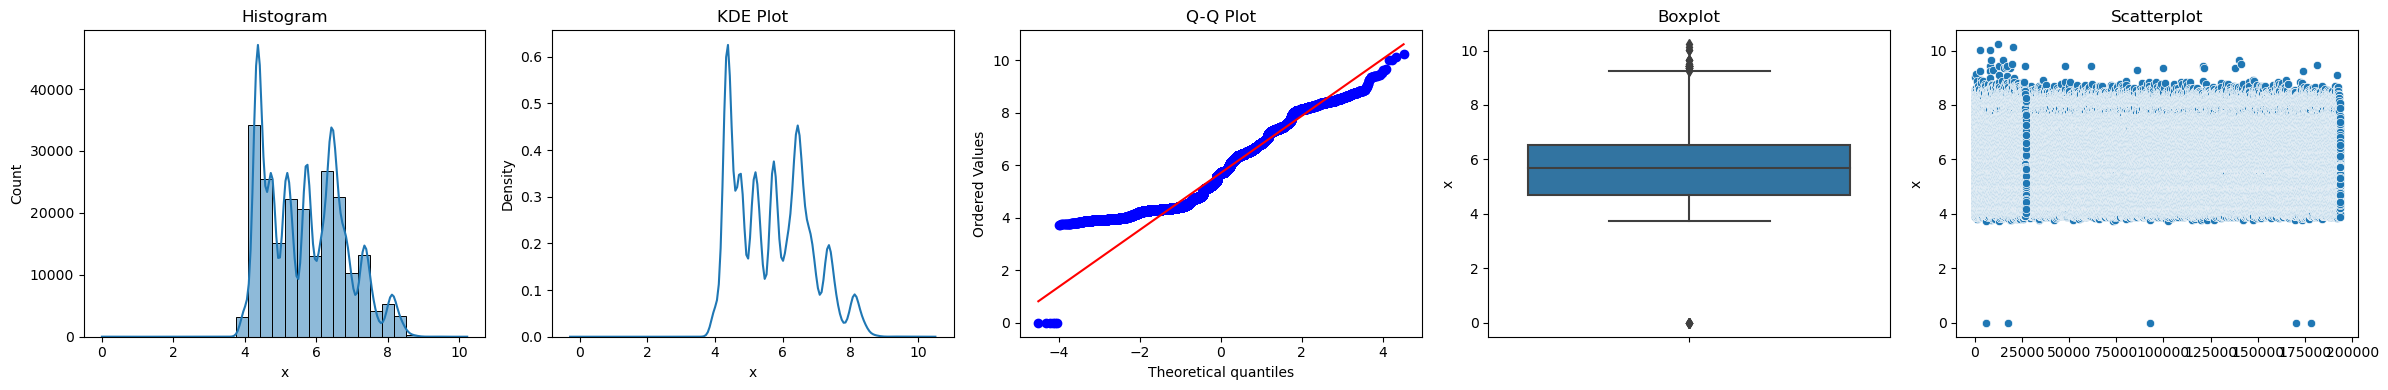

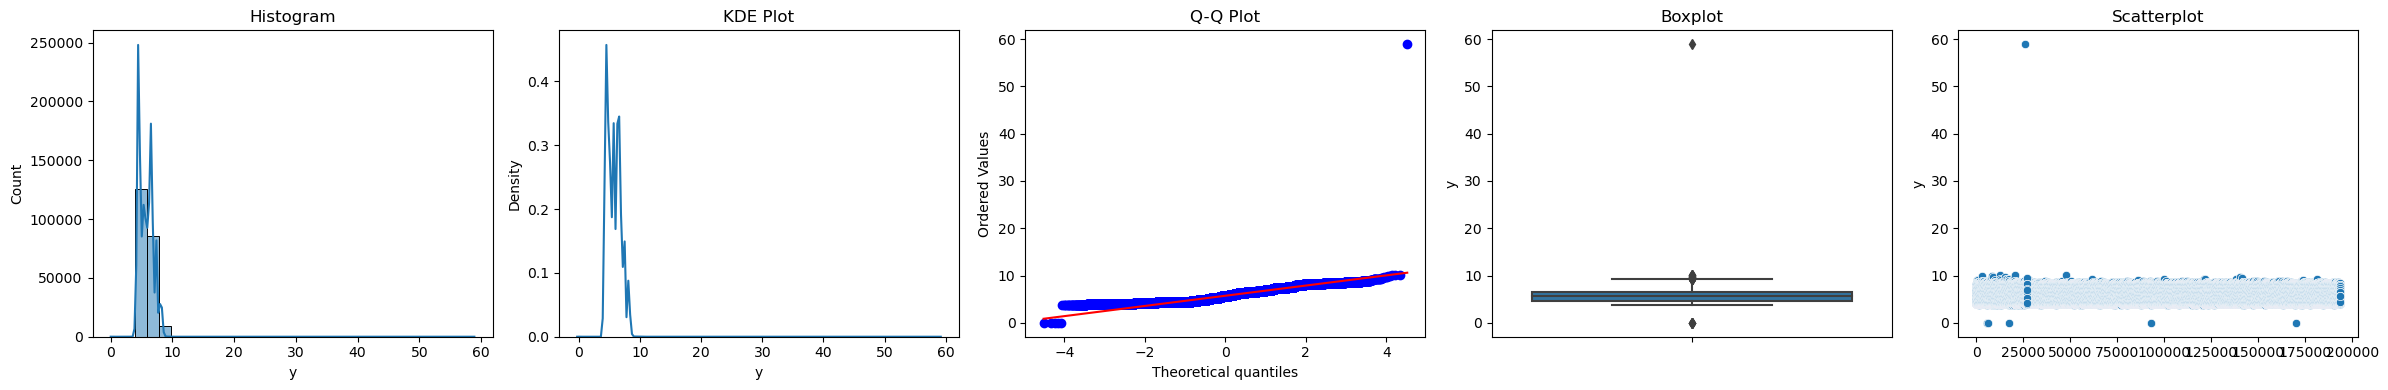

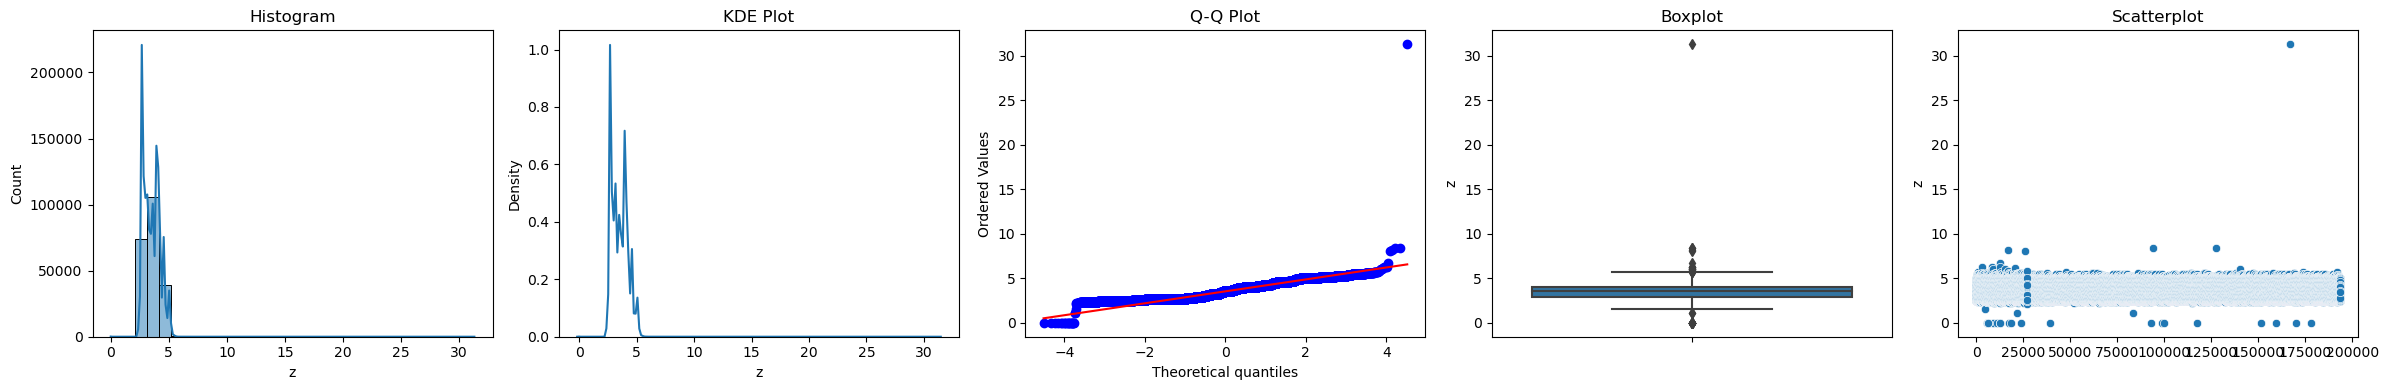

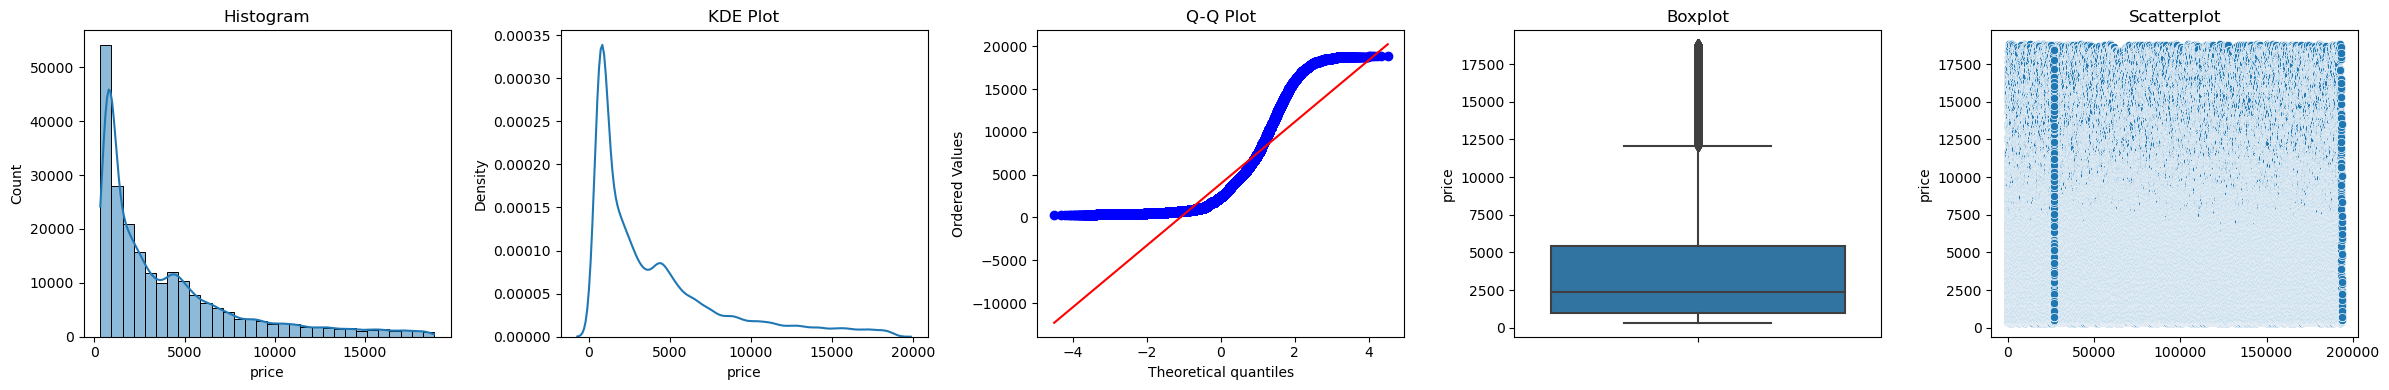

In [14]:
def plots(df, variable):
    # define figure size
    fig, ax = plt.subplots(1, 5, figsize=(24, 4))
    
    # histogram
    sns.histplot(df[variable], bins=30, kde=True, ax=ax[0])
    ax[0].set_title('Histogram')
    
    # KDE plot
    sns.kdeplot(df[variable], ax=ax[1])
    ax[1].set_title('KDE Plot')
    
    # Q-Q plots
    stats.probplot(df[variable], dist="norm", plot=ax[2])
    ax[2].set_title('Q-Q Plot')
    
    # boxplot
    sns.boxplot(y=df[variable], ax=ax[3])
    ax[3].set_title('Boxplot')
    
    # scatterplot
    sns.scatterplot(x=df.index, y=df[variable], ax=ax[4])
    ax[4].set_title('Scatterplot')
    
    plt.tight_layout()
    plt.show()

for i in numeric.columns:
    plots(numeric ,i)

### 4.4.2 plots for categorical columns

In [15]:
cate.head()

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2


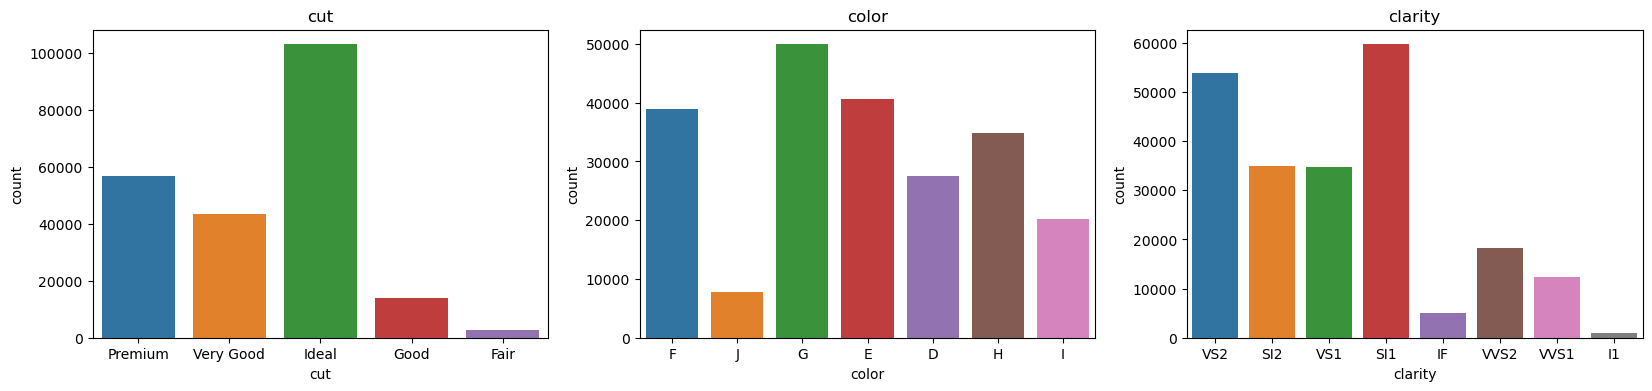

In [16]:
fig ,axs = plt.subplots(1,3 ,figsize = (20,4))
for i ,col in enumerate(cate.columns):
    sns.countplot(x=col, data=cate, ax =axs[i])
    axs[i].set_title(col)

## 4.5. Outliers Info

In [17]:
def detect_outliers(data):
    outlier_percents = {}
    for column in data.columns:
        q1 = np.quantile(data[column], 0.25)
        q3 = np.quantile(data[column], 0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outlier_percent = (outliers.shape[0] / data.shape[0]) * 100
        outlier_percents[column] = outlier_percent
        
    outlier_dataframe = pd.DataFrame(data = outlier_percents.values() ,index=outlier_percents.keys() ,columns=['Outlier_percentage'])
    
    return outlier_dataframe.sort_values(by = 'Outlier_percentage')


detect_outliers(numeric)

,Outlier_percentage
y,0.013646
x,0.015011
z,0.018650
table,2.548182
carat,3.970106
depth,4.591913
price,6.532389


## 4.6. Feature Importance

### 4.6.1. Multicollinearity Check

<AxesSubplot:>

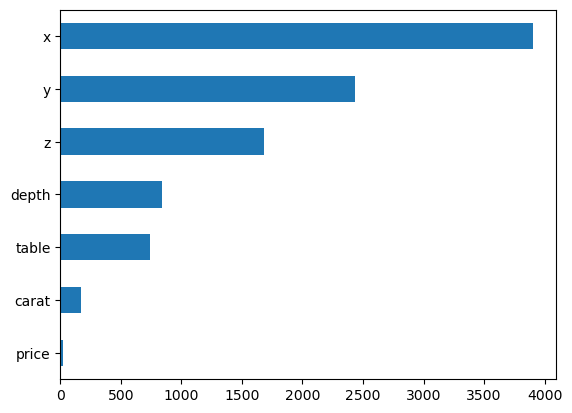

In [18]:
vif_list = []
for i in range(len(numeric.columns)):
    vif = variance_inflation_factor(numeric.to_numpy() ,i)
    vif_list.append(vif)
    
s1 = pd.Series(data = vif_list , index = numeric.columns)
s1.sort_values().plot(kind = 'barh')

# from below  graph we can say that x , y , z are having multi corrleation

### 4.6.2. Mutual info regression

<AxesSubplot:>

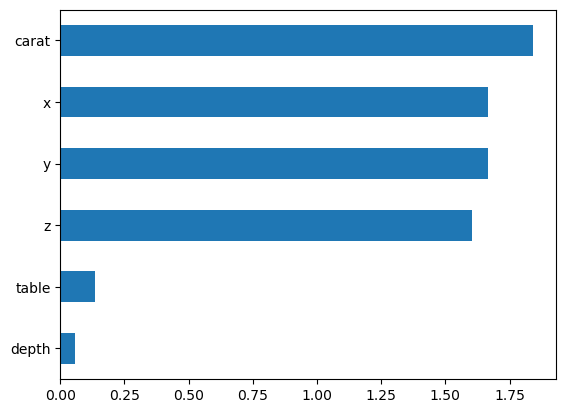

In [19]:
fea = numeric.drop('price', axis = 1)
tar = numeric['price']
array = mutual_info_regression(fea ,tar)
series = pd.Series(array , index = fea.columns)
series.sort_values().plot(kind = 'barh')


# 5. Model Preparing

In [20]:
# Handling Categorical variables
color_dic = {'D':6,'E':5,'F':4,'G':3,'H':2,'I':1,'J':0}
clarity_dic = {'FL':10, 'IF':9, 'VVS1':8, 'VVS2':7, 'VS1':6, 'VS2':5, 'SI1':4, 'SI2':3, 'I1':2, 'I2':1, 'I3':0}

def process(df):
    df['color'] = df['color'].apply(lambda x:color_dic[x])
    df['clarity'] = df['clarity'].apply(lambda x:clarity_dic[x])
    return df

In [21]:
prediction_array = {'Premium': 0,
                   'Very Good':0,
                   'Ideal' : 0,
                   'Good' : 0 ,
                   'Fair' : 0}

skf = StratifiedKFold(shuffle=True ,random_state=42)


for num ,i in enumerate(og.cut.unique()):
    
    df = og.copy()
    test = test_.copy()
    data_ = df[df['cut']  == i].drop('cut' ,axis = 1)
    test_str_ = test[test['cut']  == i].drop(['cut', 'id'] ,axis = 1)
    data = process(data_)
    test_str = process(test_str_)
    
    
    X = data.drop('price' ,axis = 1)
    y = data['price']
    
    
    y_preds = []

    for fold , (train_idx ,test_idx) in enumerate(skf.split(X,y)):
        X_train ,X_test = X.iloc[train_idx] , X.iloc[test_idx]
        y_train , y_test = y.iloc[train_idx] ,y.iloc[test_idx]

        model  = XGBRegressor()

        model.fit(X_train ,y_train)

        y_pred = model.predict(test_str)

        y_preds.append(y_pred)

    sample = pd.DataFrame(data = y_preds)
    sample = sample.T
    sample.columns = ["1","2","3","4" ,"5"]
    sample['add'] = sample.apply(lambda x : ((x['1']+x["2"]+x["3"]+x["4"]+x["5"])/5) ,axis = 1)
    x = np.array(sample['add'])
    prediction_array[i] = x

print("ok")

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


ok


In [22]:
for i in test.cut.unique():
    inde = test[test['cut'] == i].index
    test.loc[inde , 'price'] = prediction_array[i]

# 6. Submission CSV

In [23]:
sub = pd.read_csv('/kaggle/input/playground-series-s3e8/sample_submission.csv')
sub['price'] =  test['price']
sub.to_csv('Submission.csv' , index = False)